In [1]:
import ROOT as rt
import uproot
# from root_numpy import root2array, tree2array
#from root_pandas import read_root
import h5py 

import numpy as np
import numpy.lib.recfunctions as nlr
import pandas as pd
import os, sys
from matplotlib import pyplot as plt
import math
import json

#import gpustat
#gpustat.print_gpustat()
#os.environ['CUDA_VISIBLE_DEVICES']='3'

Welcome to JupyROOT 6.22/06


In [2]:
def samp_to_df(file_name):
    samp_file = uproot.open(file_name)
    samp_array = samp_file['Events'].arrays()
    samp_df = pd.DataFrame(samp_array)
    return samp_df

In [85]:
path = '/storage/af/user/nlu/work/HH/ntuples/20210712_regression_v2/option5/combined/BDT/'

years = ['2016', '2017', '2018']

tunes_qcd = {'2016': '_TuneCUETP8M1_13TeV-madgraphMLM-pythia8-combined_1pb_weighted_Testing_BDTs.root',
         '2017': '_TuneCP5_13TeV-madgraph-pythia8_1pb_weighted_Testing_BDTs.root',
         '2018': '_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted_Testing_BDTs.root'}

tunes_tth = {'2016': '_TuneCP5_PSweights_13TeV-powheg-pythia8_1pb_weighted_Testing_BDTs.root',
         '2017': '_TuneCP5_13TeV-powheg-pythia8-combined_1pb_weighted_Testing_BDTs.root',
         '2018': '_TuneCP5_13TeV-powheg-pythia8-combined_1pb_weighted_Testing_BDTs.root'}

tunes_ttl = {'2016': '_TuneCP5_PSweights_13TeV-powheg-pythia8_1pb_weighted_Testing_BDTs.root',
         '2017': '_TuneCP5_13TeV-powheg-pythia8-combined_1pb_weighted_Testing_BDTs.root',
         '2018': '_TuneCP5_13TeV-powheg-pythia8-combined_1pb_weighted_Testing_BDTs.root'}

tunes_gghh = {'2016': '_TuneCUETP8M1_PSWeights_13TeV-powheg-pythia8_1pb_weighted_Testing_BDTs.root',
         '2017': '_TuneCP5_PSWeights_13TeV-powheg-pythia8_1pb_weighted_Testing_BDTs.root',
         '2018': '_TuneCP5_PSWeights_13TeV-powheg-pythia8_1pb_weighted_Testing_BDTs.root'}

tunes_vbfhh = {'2016': '_dipoleRecoilOff-TuneCUETP8M1_PSweights_13TeV-madgraph-pythia8_1pb_weighted_BDTs.root',
         '2017': '_dipoleRecoilOff-TuneCP5_PSweights_13TeV-madgraph-pythia8_1pb_weighted_BDTs.root',
         '2018': '_dipoleRecoilOff-TuneCP5_PSweights_13TeV-madgraph-pythia8_1pb_weighted_BDTs.root'}

qcd_HTbins = ['200to300', '300to500', '500to700', '700to1000', '1000to1500', '1500to2000', '2000toInf']

qcd_dfs = []
ttbarh_dfs = []
ttbarl_dfs = []
HHggSM_dfs = []
HHVBFSM_dfs = []

for iyear in years:
    for ihtbin in qcd_HTbins:
        if iyear=='2017' and ihtbin =='200to300':
            continue
        qcd_dfs.append(samp_to_df(path+iyear+'/qcd/QCD_HT'+ihtbin+tunes_qcd[iyear]))
    ttbarh_dfs.append(samp_to_df(path+iyear+'/ttbar/TTToSemiLeptonic'+tunes_tth[iyear]))
    ttbarl_dfs.append(samp_to_df(path+iyear+'/ttbar/TTToSemiLeptonic'+tunes_ttl[iyear]))
    HHggSM_dfs.append(samp_to_df(path+iyear+'/HHc1/GluGluToHHTo4B_node_cHHH1'+tunes_gghh[iyear]))
    HHVBFSM_dfs.append(samp_to_df(path+iyear+'/HHVBFSM/VBF_HH_CV_1_C2V_1_C3_1'+tunes_vbfhh[iyear]))

qcd_df = pd.concat(qcd_dfs, ignore_index=True)
ttbarh_df = pd.concat(ttbarh_dfs, ignore_index=True)
ttbarl_df = pd.concat(ttbarl_dfs, ignore_index=True)
HHggSM_df = pd.concat(HHggSM_dfs, ignore_index=True)
HHVBFSM_df = pd.concat(HHVBFSM_dfs, ignore_index=True)

In [86]:
qcd_df[b'weight'][10]

2.0

In [87]:
dfs = [qcd_df, ttbarh_df, ttbars_df, HHggSM_df, HHVBFSM_df]
df_names = ['QCD','TTToHadronic','TTToSemiLeptonic','GluGluToHH', 'VBFToHH']
colors = ['blue', 'red', 'black', 'olive', 'seagreen', 'forestgreen', 'navy', 'purple', 'salmon', 'darkorange', 'crimson','']

branch_names = [b'fatJet1MassSD', b'fatJet1MassRegressed', b'fatJet2MassSD', b'fatJet2MassRegressed', b'hh_pt', b'hh_eta', b'hh_mass', b'met', b'fatJet1Tau3OverTau2', b'fatJet2Tau3OverTau2', b'fatJet1Pt', b'fatJet1Eta',
           b'fatJet1PNetXbb', b'fatJet1PNetQCDb', b'fatJet1PNetQCDbb', b'fatJet1PNetQCDothers', b'fatJet2Pt', b'fatJet1PtOverMHH',
                b'fatJet2PtOverMHH', b'ptj2_over_ptj1', b'disc_qcd_and_ttbar_Run2_enhanced_v8p2']

var_names = ['fatJet1MassSD', 'fatJet1MassRegressed', 'fatJet2MassSD', 'fatJet2MassRegressed', 'hh_pt', 'hh_eta', 'hh_mass', 'MET', 'fatJet1Tau3OverTau2', 'fatJet2Tau3OverTau2','fatJet1Pt', 'fatJet1Eta',
        'fatJet1PNetXbb', 'fatJet1PNetQCDb', 'fatJet1PNetQCDbb', 'fatJet1PNetQCDothers', 'fatJet2Pt', 'fatJet1PtOverMHH',
             'fatJet2PtOverMHH', 'ptj2_over_ptj1', 'disc_qcd_and_ttbar_Run2_enhanced_v8p2']
var_titles = ['${m_{SD}}^{Jet 1}$','${m_{regressed}}^{Jet 1}$', '${m_{SD}}^{Jet 2}$', '${m_{regressed}}^{Jet 2}$', '$p_{T}$ of dijet system [GeV]', '$\eta$ of dijet system', 'mass of dijet system', 'MET [GeV]', r'$\tau_{32}^{Jet 1}$', 
              r'$\tau_{32}^{Jet 2}$', '${p_{T}}_{Jet 1}$', '$\eta_{Jet 1}$',
        'Jet 1 tagger $P_{Xbb}$', 'Jet 1 tagger $P_{QCDb}$', 'Jet 1 tagger $P_{QCDbb}$', 'Jet 1 tagger $P_{QCDothers}$', 
              '${p_{T}}_{Jet 2}$', 'Jet 1 $p_{T}$ over dijet system mass',
             'Jet 2 $p_{T}$ over dijet system mass', '${p_{T}}^{j1} / {p_{T}}^{j2}$', 'Event BDT score']

xlim_lo = [0,   0,   0,   0,   0,   -8, 0,   0,  0,0, 250, -3, 0.8, 0,   0.0, 0,    250,  0, 0, 0, 0]
xlim_hi = [300, 300, 300, 300, 1000,8,  3000,500,1,1,1250, 3,  1.0, 0.1, 0.2, 0.02, 1250, 1, 1, 3, 1]

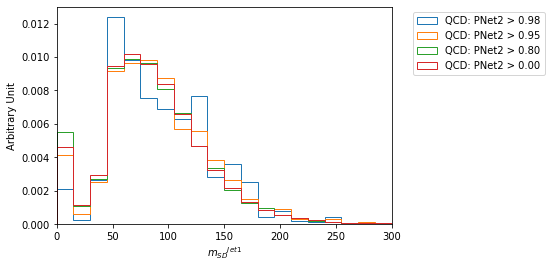

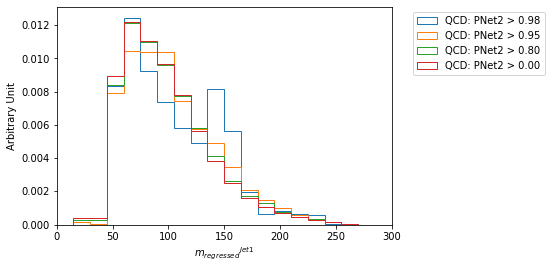

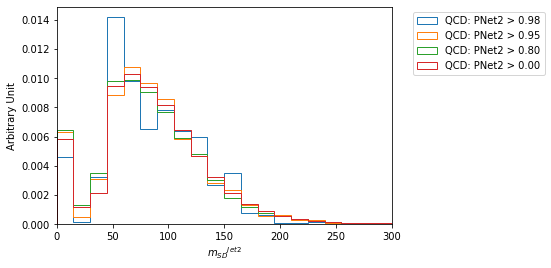

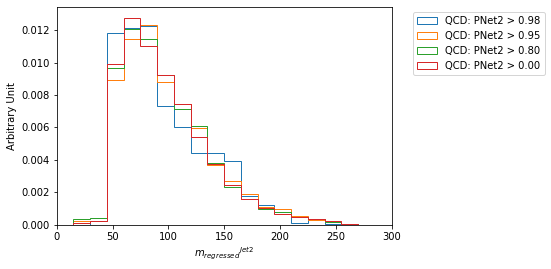

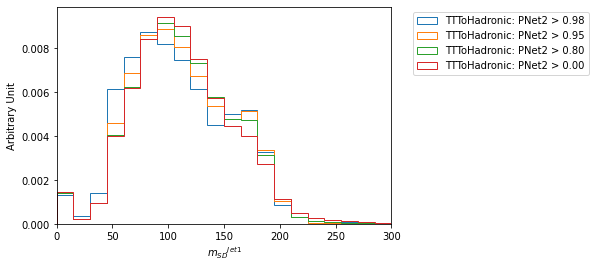

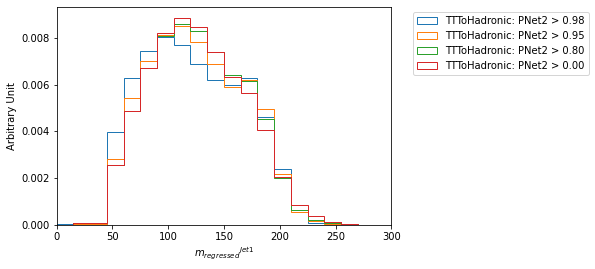

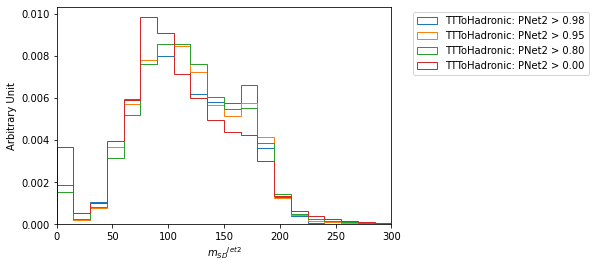

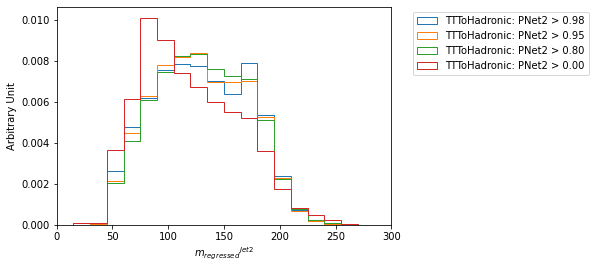

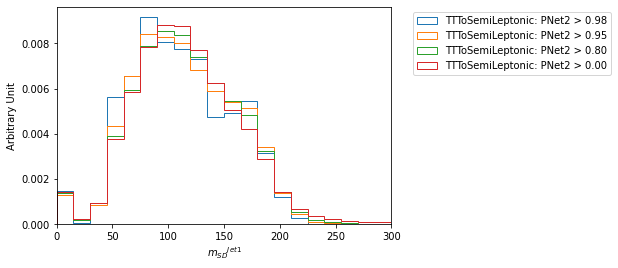

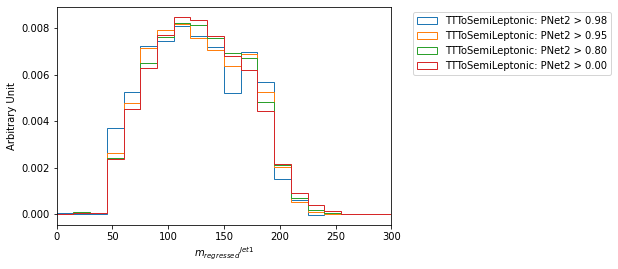

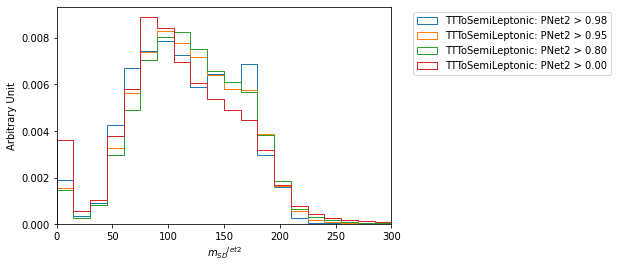

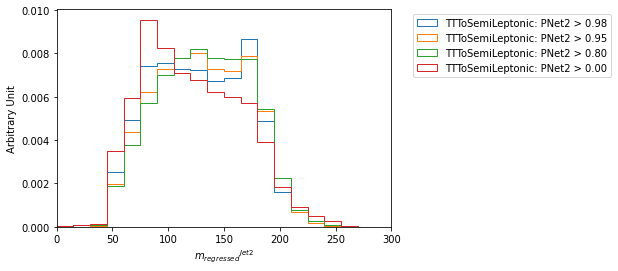

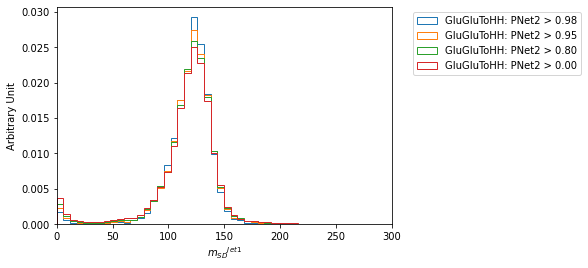

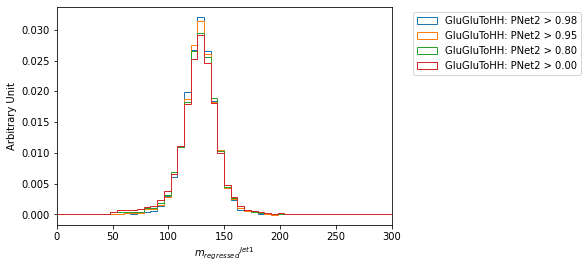

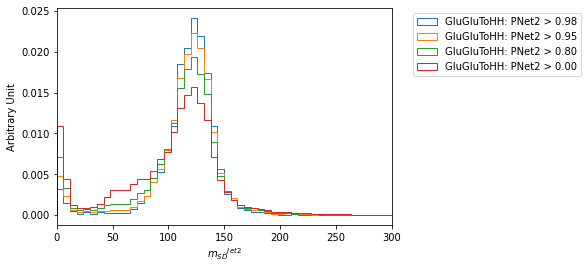

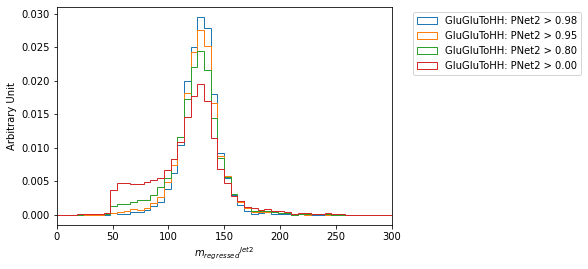

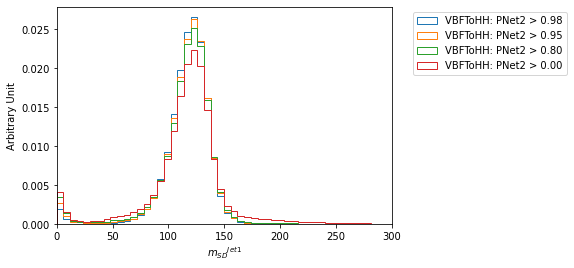

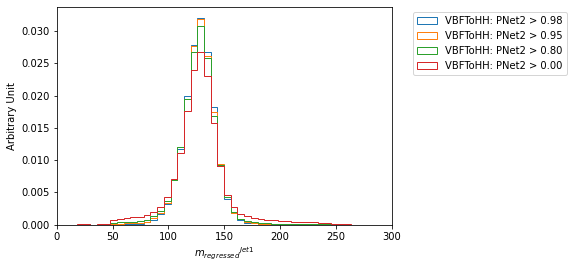

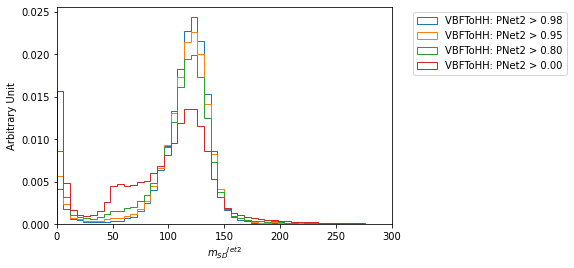

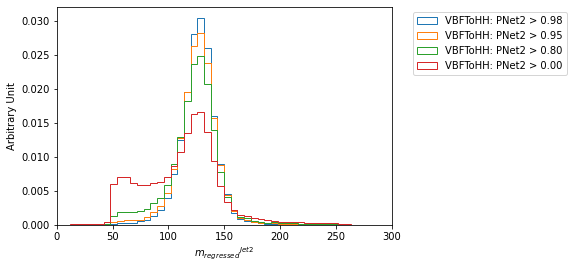

In [94]:
thresholds = [0.98, 0.95, 0.8, 0.0]

nbins = 20
for i in range(5):
    #for j in range(len(var_names)):
    for j in range(4):
        plt.figure
        #plt.yscale('log')
        plt.xlim(xlim_lo[j], xlim_hi[j])
        for threshold in thresholds:
            #print(threshold)
            if i==3 or i==4:
                nbins = 50
                plt.hist(dfs[i][branch_names[j]][dfs[i][b'fatJet2PNetXbb']>threshold], bins=nbins, histtype='step', weights = (dfs[i][b'triggerEff3DWeight']*dfs[i][b'puWeight']*dfs[i][b'l1PreFiringWeight']*dfs[i][b'xsecWeight']*dfs[i][b'weight'])[dfs[i][b'fatJet2PNetXbb']>threshold], range=(xlim_lo[j], xlim_hi[j]), density=True, label=df_names[i]+": PNet2 > {:.2f}".format(threshold)) #range=(0,1))
            else:
                plt.hist(dfs[i][branch_names[j]][dfs[i][b'fatJet2PNetXbb']>threshold], bins=nbins, histtype='step', weights = (dfs[i][b'triggerEff3DWeight']*dfs[i][b'puWeight']*dfs[i][b'l1PreFiringWeight']*dfs[i][b'xsecWeight']*dfs[i][b'genWeight'])[dfs[i][b'fatJet2PNetXbb']>threshold], range=(xlim_lo[j], xlim_hi[j]), density=True, label=df_names[i]+": PNet2 > {:.2f}".format(threshold)) #range=(0,1))
     
        plt.xlabel(var_titles[j])
        plt.ylabel("Arbitrary Unit")
        plt.legend(bbox_to_anchor=(1.05, 1))
        #plt.legend(loc='best')
        #plt.savefig(var_names[j]+"1.pdf", dpi=150)
        plt.show()

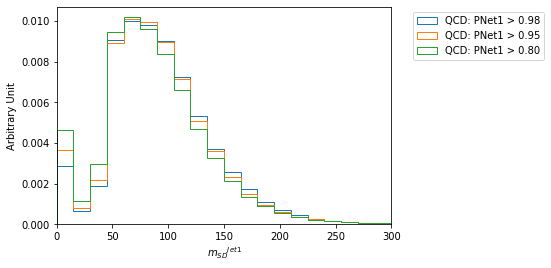

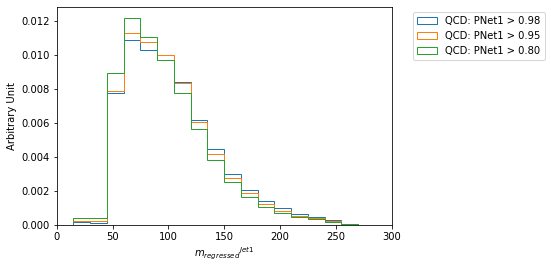

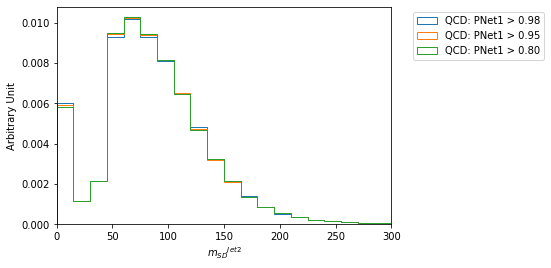

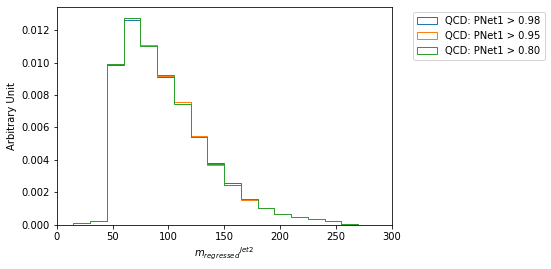

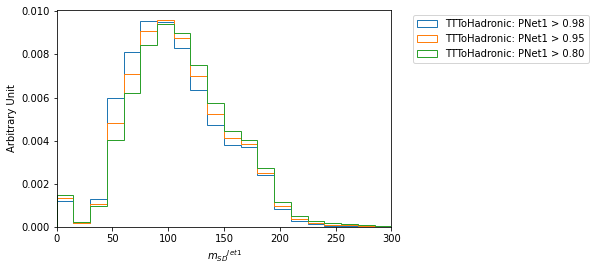

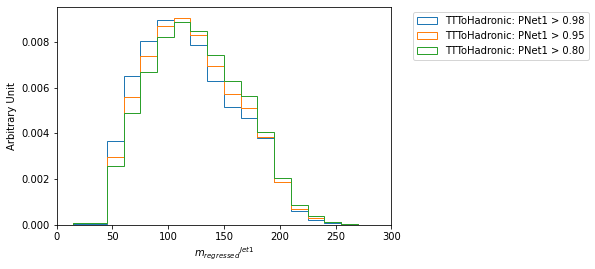

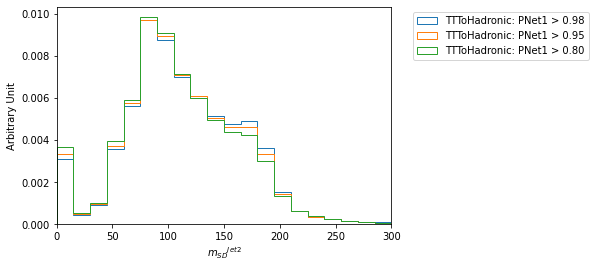

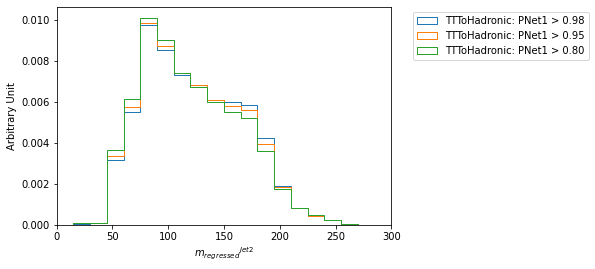

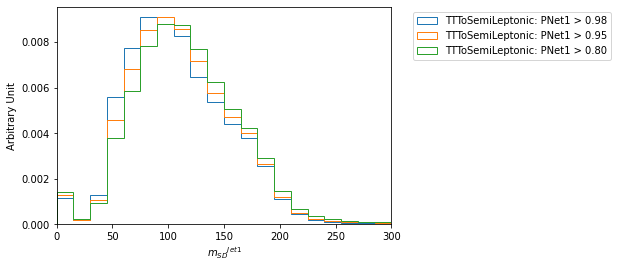

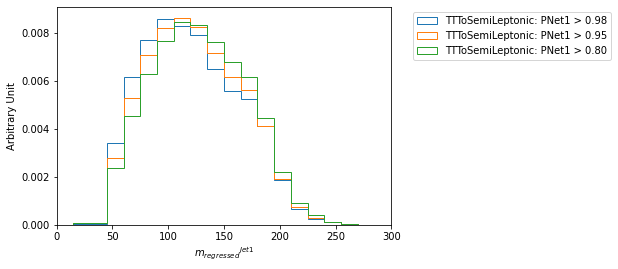

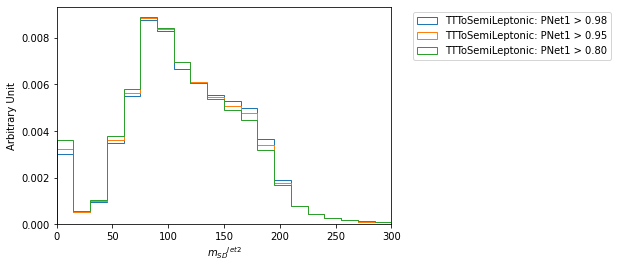

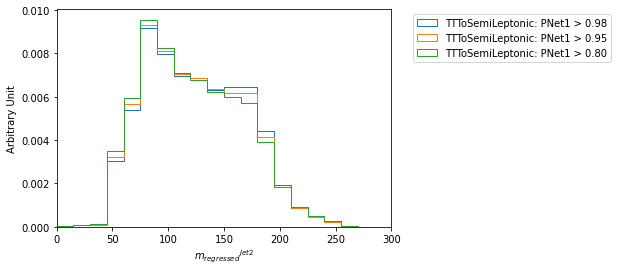

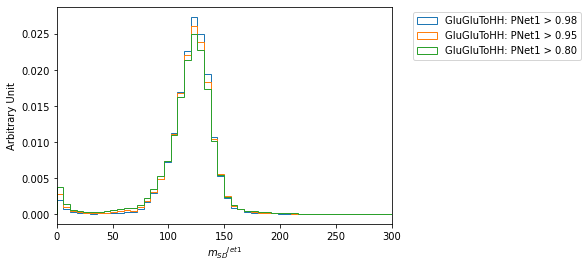

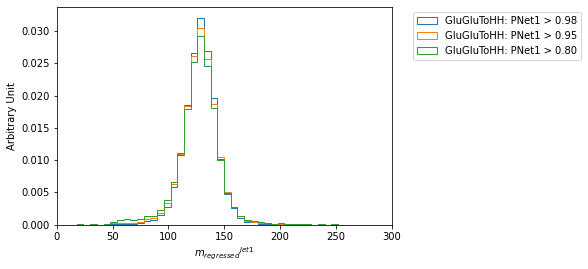

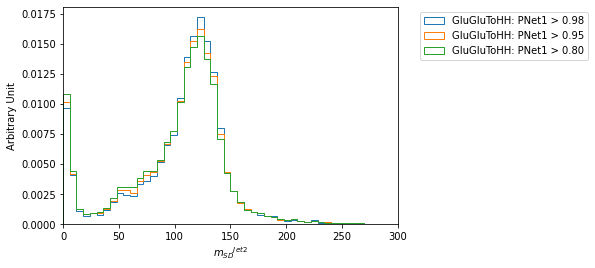

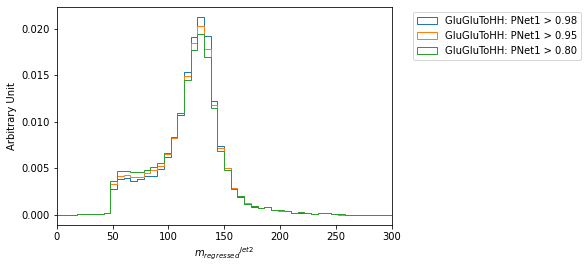

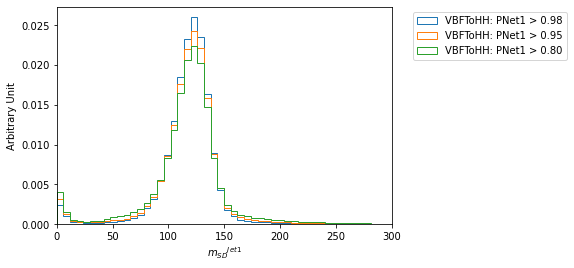

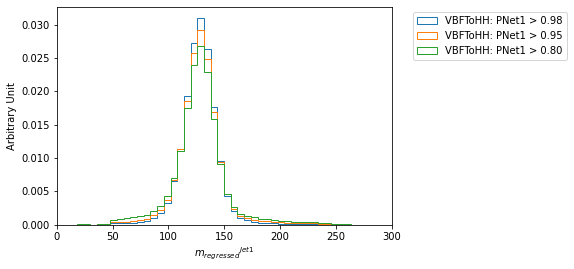

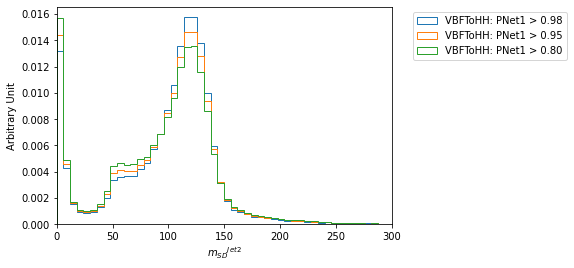

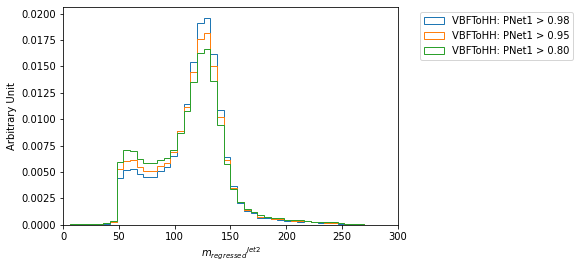

In [95]:
thresholds = [0.98, 0.95, 0.8]

nbins = 20
for i in range(5):
    #for j in range(len(var_names)):
    for j in range(4):
        plt.figure
        #plt.yscale('log')
        plt.xlim(xlim_lo[j], xlim_hi[j])
        for threshold in thresholds:
            #print(threshold)
            if i==3 or i==4:
                nbins = 50
                plt.hist(dfs[i][branch_names[j]][dfs[i][b'fatJet1PNetXbb']>threshold], bins=nbins, histtype='step', weights = (dfs[i][b'triggerEff3DWeight']*dfs[i][b'puWeight']*dfs[i][b'l1PreFiringWeight']*dfs[i][b'xsecWeight']*dfs[i][b'weight'])[dfs[i][b'fatJet1PNetXbb']>threshold], range=(xlim_lo[j], xlim_hi[j]), density=True, label=df_names[i]+": PNet1 > {:.2f}".format(threshold)) #range=(0,1))
            else:
                plt.hist(dfs[i][branch_names[j]][dfs[i][b'fatJet1PNetXbb']>threshold], bins=nbins, histtype='step', weights = (dfs[i][b'triggerEff3DWeight']*dfs[i][b'puWeight']*dfs[i][b'l1PreFiringWeight']*dfs[i][b'xsecWeight']*dfs[i][b'genWeight'])[dfs[i][b'fatJet1PNetXbb']>threshold], range=(xlim_lo[j], xlim_hi[j]), density=True, label=df_names[i]+": PNet1 > {:.2f}".format(threshold)) #range=(0,1))
     
        plt.xlabel(var_titles[j])
        plt.ylabel("Arbitrary Unit")
        plt.legend(bbox_to_anchor=(1.05, 1))
        #plt.savefig(var_names[j]+"1.pdf", dpi=150)
        plt.show()

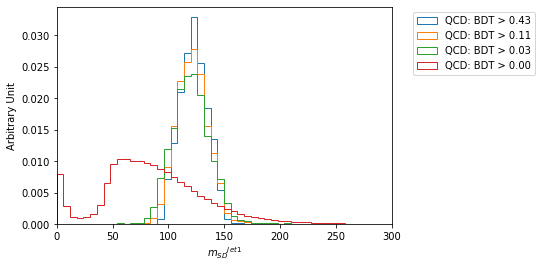

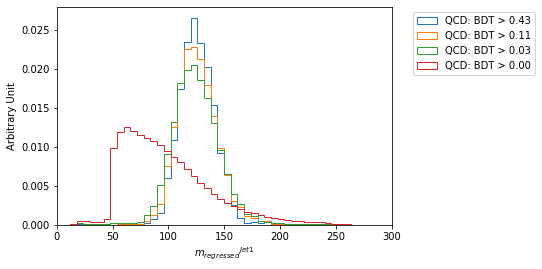

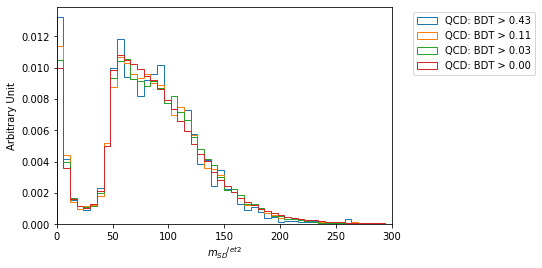

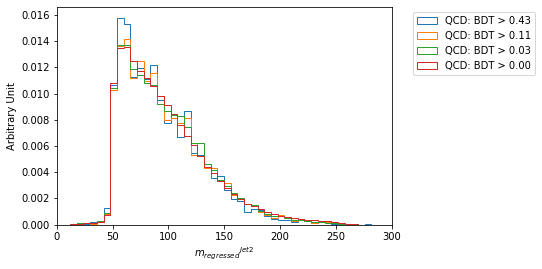

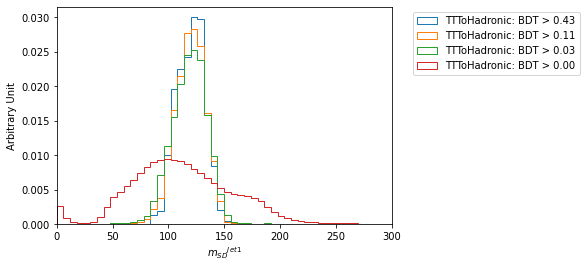

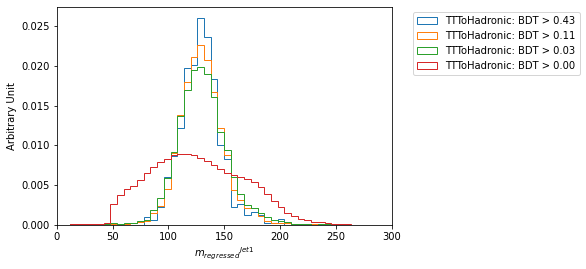

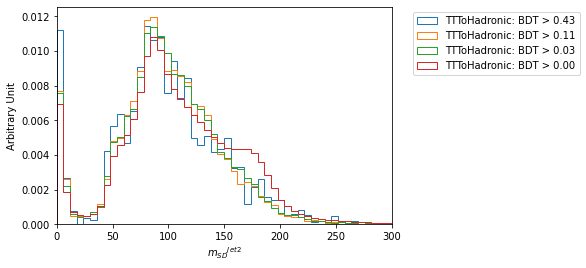

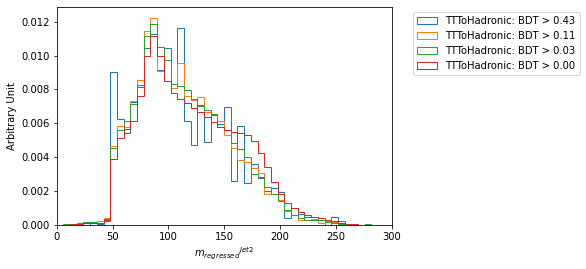

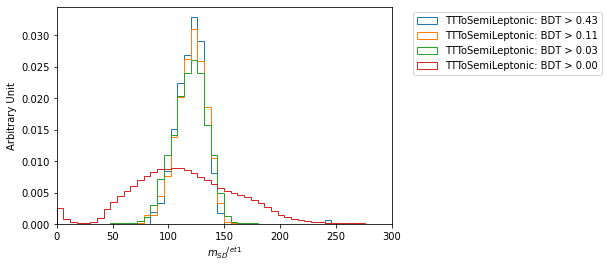

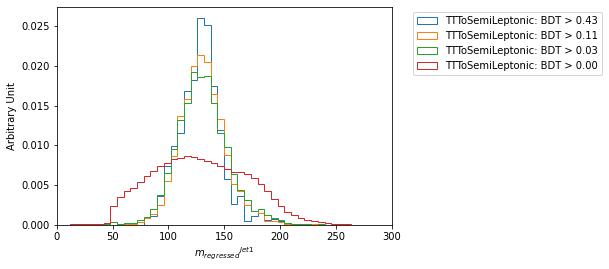

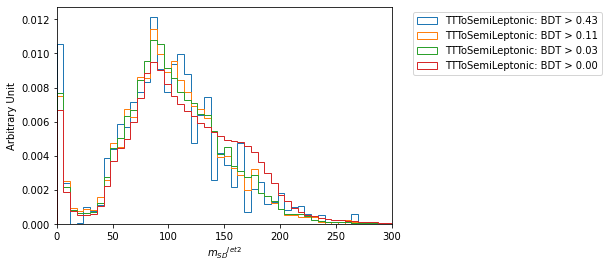

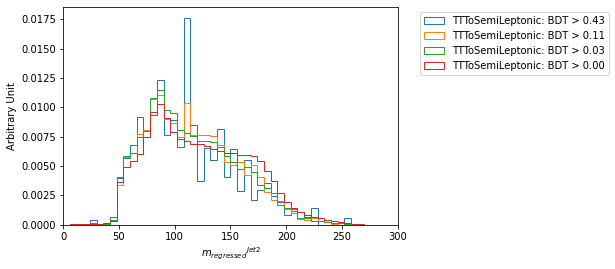

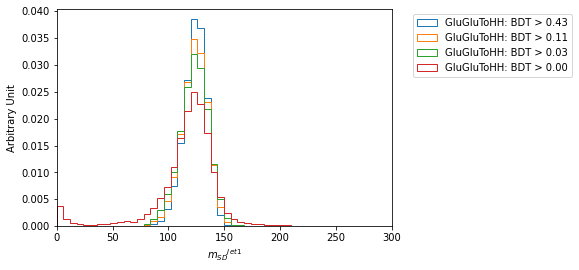

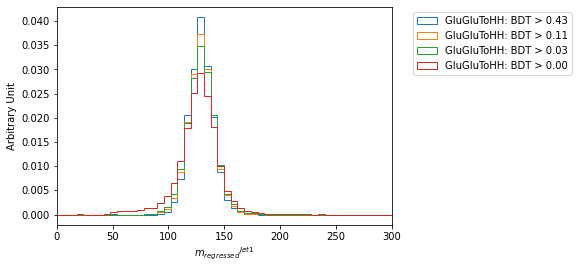

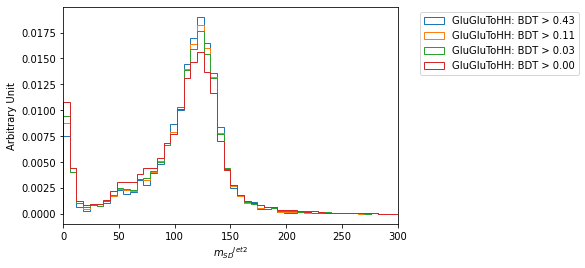

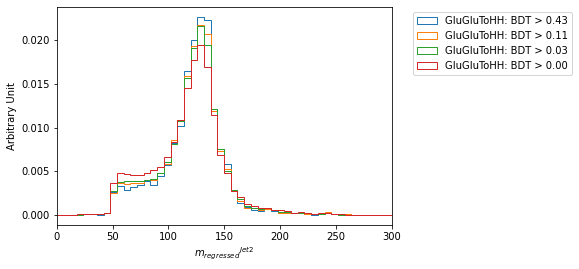

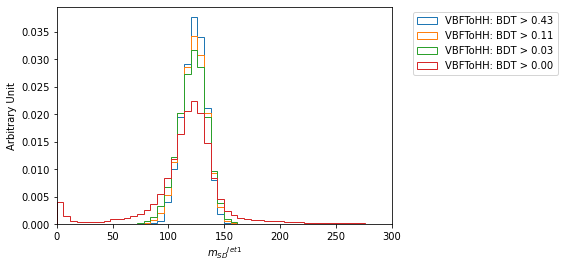

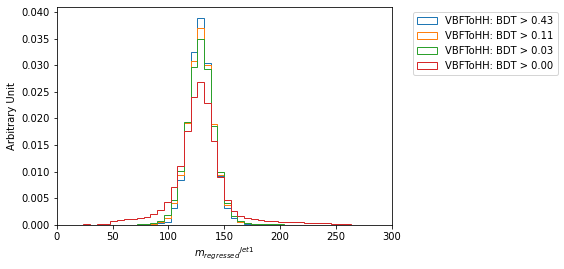

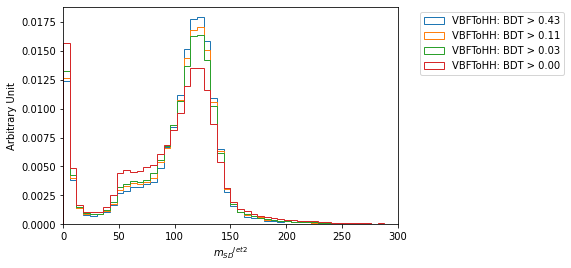

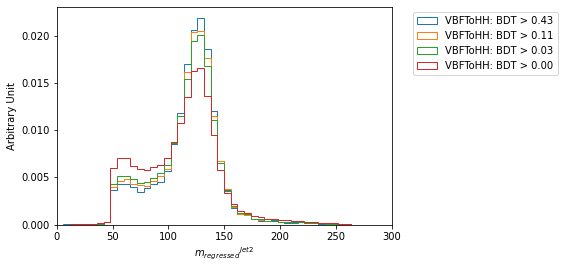

In [97]:
thresholds = [0.43,  0.11, 0.03, 0.0]

nbins = 50
for i in range(5):
    #for j in range(len(var_names)):
    for j in range(4):
        plt.figure
        #plt.yscale('log')
        plt.xlim(xlim_lo[j], xlim_hi[j])
        for threshold in thresholds:
            #print(threshold)
            if i==3 or i==4:
                nbins = 50
                plt.hist(dfs[i][branch_names[j]][dfs[i][b'disc_qcd_and_ttbar_Run2_enhanced_v8p2']>threshold], bins=nbins, histtype='step', weights = (dfs[i][b'triggerEff3DWeight']*dfs[i][b'puWeight']*dfs[i][b'l1PreFiringWeight']*dfs[i][b'xsecWeight']*dfs[i][b'weight'])[dfs[i][b'disc_qcd_and_ttbar_Run2_enhanced_v8p2']>threshold], range=(xlim_lo[j], xlim_hi[j]), density=True, label=df_names[i]+": BDT > {:.2f}".format(threshold)) #range=(0,1))
            else:
                plt.hist(dfs[i][branch_names[j]][dfs[i][b'disc_qcd_and_ttbar_Run2_enhanced_v8p2']>threshold], bins=nbins, histtype='step', weights = (dfs[i][b'triggerEff3DWeight']*dfs[i][b'puWeight']*dfs[i][b'l1PreFiringWeight']*dfs[i][b'xsecWeight']*dfs[i][b'genWeight'])[dfs[i][b'disc_qcd_and_ttbar_Run2_enhanced_v8p2']>threshold], range=(xlim_lo[j], xlim_hi[j]), density=True, label=df_names[i]+": BDT > {:.2f}".format(threshold)) #range=(0,1))
     
        plt.xlabel(var_titles[j])
        plt.ylabel("Arbitrary Unit")
        plt.legend(bbox_to_anchor=(1.05, 1))
        #plt.savefig(var_names[j]+"1.pdf", dpi=150)
        plt.show()